In [24]:
# import libraries

import numpy as np
import torch
import torch.nn as nn
import copy

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [25]:
# create model

net = nn.Sequential(
    nn.Linear(2,8), # input layer
    nn.Linear(8,1), # hidden layer
    nn.Linear(1,1), # output layer
)

# Create the network

In [26]:
### NO RANDOM SEED

# create " template network"
net_noseed = copy.deepcopy( net )

# update weights
for p in net_noseed.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [27]:
### Random seed 1a

# create "template network"
net_rs1a = copy.deepcopy( net )

# set the seed to 1
torch.manual_seed(1)

for p in net_rs1a.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [28]:
### Random seed 2

# create "template network"
net_rs2 = copy.deepcopy( net )

# set the seed to 2
torch.manual_seed(2)

for p in net_rs2.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [29]:
### Random seed 1b

# create "template network"
net_rs1b = copy.deepcopy( net )

# set the seed to 1
torch.manual_seed(1)

for p in net_rs1b.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

# Extract all weights from all networks

In [30]:
w_ns = np.array([])
w_1a = np.array([])
w_1b = np.array([])
w_2 = np.array([])

# loop over all layers
for i in range(3):
  # extract the vectorized weight matrices
  w_ns = np.append(w_ns,net_noseed[i].weight.view(-1).detach().numpy())
  w_1a = np.append(w_1a,net_rs1a[i].weight.view(-1).detach().numpy())
  w_2 = np.append(w_2,net_rs2[i].weight.view(-1).detach().numpy())
  w_1b = np.append(w_1b,net_rs1b[i].weight.view(-1).detach().numpy())

w_2

array([-0.46546042,  0.40991783, -0.58325166, -0.49626327, -0.54505414,
        0.52216321, -0.47288013, -0.05314658, -0.40599832,  0.15438807,
       -0.25550827, -0.1051439 ,  0.45061475, -0.33669883, -0.1006227 ,
       -0.19350307, -0.18474619, -0.4915235 ,  0.62160218,  0.35244039,
       -0.62530899, -0.5851531 , -0.04846271, -0.44772261,  0.61810493])

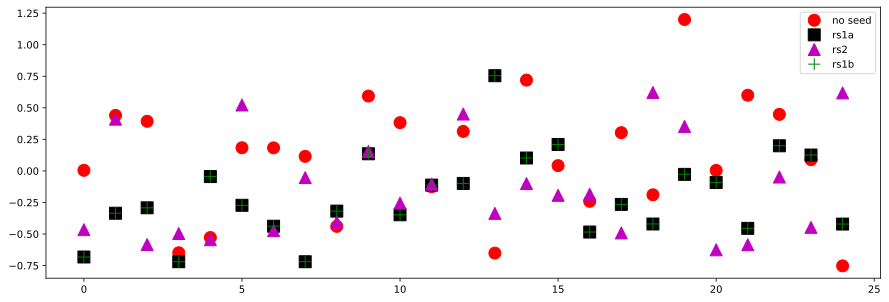

In [31]:
fig = plt.figure(figsize = (15,5))

plt.plot(w_ns,'ro',markersize = 12, label = 'no seed')
plt.plot(w_1a,'ks',markersize = 12,label = 'rs1a')
plt.plot(w_2,'m^',markersize = 12,label = 'rs2')
plt.plot(w_1b,'g+',markersize = 12,label = 'rs1b')

plt.legend()